# DSCI 572 "lecture" 5

In [16]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [17]:
plt.rcParams['font.size'] = 16

In [18]:
%autosave 0

Autosave disabled


## The plan

- True/false questions (10 min)
- Classification / softmax / Keras (10 min)
- More true/false questions (10 min)
- Break (5 min)
- Optimization (10 min)
- Fundamental tradeoff (10 min)
- More true/false questions (10 min)
- Summary / preview (5 min)
- Discussion with block rep (5-10 min)

## True/false questions left over from last class (10 min)

1. Any neural network with 3 hidden layers will have more parameters than any neural network with 2 hidden layers.
2. With neural networks, we have a potentially large number of **discrete** hyperparamaters. 
3. With neural networks, we have a potentially large number of **discrete** paramaters. 
4. Like linear regression or logistic regression, with neural networks we can interpret each feature's weight value as a measure of the feature's importance.

<br><br><br><br><br><br><br><br><br>

## Classification / softmax (10 min)

- To use a neural net for classification, we take advantage of the fact that the output doesn't have to be 1-dimensional ($k>1$)
- For example, with the digits dataset there are $10$ classes, so we set the size of the last layer to $k=10$ and use a _one-hot encoding_ for the data
- We can then use the softmax loss - in other words, we're doing logistic regression using the "features" learned by all previous layers

In [19]:
digits = datasets.load_digits()
X = digits['data']/255
y = digits['target']

In [20]:
y.shape

(1797,)

In [21]:
Y = np_utils.to_categorical(y, 10) # make it 1-hot

In [22]:
Y.shape

(1797, 10)

In [23]:
print(Y)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [25]:
model = Sequential()
model.add(Dense(500, input_dim=X.shape[1], activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

Above: last layer size is 10, softmax activation.

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- Above: Mark should talk about the "categorical cross-entropy loss" a.k.a. "softmax loss". 
- But for now, that's just the loss we use for classification. 
- It's a generalization of the logistic loss to multi-class.
- It's the exact same loss as multinomial (aka softmax) logistic regression.

In [38]:
model.fit(X_train, Y_train, epochs=10, verbose=0)

In [29]:
training_loss = model.evaluate(X_train, Y_train, verbose=0)
print("Training %s: %.2f" % (model.metrics_names[0], training_loss[0]))
print("Training %s: %.2f" % (model.metrics_names[1], training_loss[1]))

test_loss = model.evaluate(X_test, Y_test, verbose=0)
print("Test %s: %.2f" % (model.metrics_names[0], test_loss[0]))
print("Test %s: %.2f" % (model.metrics_names[1], test_loss[1]))

Training loss: 0.11
Training acc: 0.97
Test loss: 0.16
Test acc: 0.95


Above: `training_loss` contains the loss and also the accuracy, since we asked for it above when we set `metrics=['accuracy']`.

In [30]:
probs = model.predict(X_train)[0]
probs

array([2.5961941e-07, 9.9155676e-01, 3.2677960e-07, 4.5283741e-05,
       4.2650939e-04, 3.3287233e-06, 1.3379059e-05, 5.9656963e-06,
       6.6208891e-03, 1.3273519e-03], dtype=float32)

In [31]:
np.sum(probs)

1.0

In [33]:
np.argmax(probs)

1

In [35]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## More true/false - stochastic gradient (10 min)

1. For stochastic gradient to work, we need to increase the step size as the optimization proceeds.
2. Stochastic gradient can be used for training many models, like logistic regression and random forests.
3. An iteration of stochastic gradient might cause the loss might go up, even for a very small learning rate.
4. It's not practical to check whether the loss went up or down after each iteration of stochastic gradient.

<br><br><br><br><br><br><br><br><br>

## Break (5 min)

## Optimization (10 min)

Let's modify the call to `fit` in two ways:

1. Let's store the output of `fit`, which is a "history" object.
2. Let's provide the validation set to `fit`.

In [49]:
model = Sequential()
model.add(Dense(500, input_dim=X.shape[1], activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=40, verbose=0, validation_data=(X_test, Y_test))

If this makes you uncomfortable, that's good. Are we violating the golden rule??

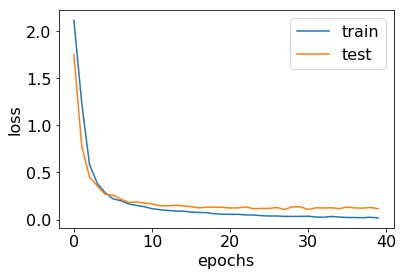

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test']);

#### epochs

What are epochs?

- An epoch is an entire pass through the training set.
- With minibatch size of 1, an epoch is `n` iterations.
- With a general minibatch size, 

$\text{epochs} = \frac{\text{iterations}}{n}\times \text{batch size}$

Example: if the dataset has $100,000$ examples and your minibatch size is $1000$, then an epoch is $100$ iterations of stochastic gradient descent.

Vocabulary (discussed in video / video slides):

- epochs
- early stopping
- vanishing gradient
- initialization
- momentum 

## The fundamental tradeoff, the 3 pieces of ML (10 min)

- ~~You've covered~~ You're about to cover regularization in DSCI 573.
- Neural nets use some standard regularization and some funny ones
- _Weight decay_: just a name for L2-regularization on the weights
- [Batch normalization](https://arxiv.org/abs/1502.03167) normalizes values during training
- Dropout: randomly delete (set to 0) your activations
  - this sounds crazy but there's a lot of intuition here
  - preventing co-adaptation
  - has an interpretation as ensembling models with different architectures
  
Also:

- Things get weird when we start mixing the fundamental tradeoff and optimization.
- Taking a step back, I view your decision-making process in ML as having three pieces:


1. Pick your model
2. Pick your loss
3. Pick your optimizer

Example:

1. Neural network with one hidden layer of size 10
2. Squared error
3. Stochastic gradient

It seems like the fundamental tradeoff is mainly a matter of (1) but... remember this?

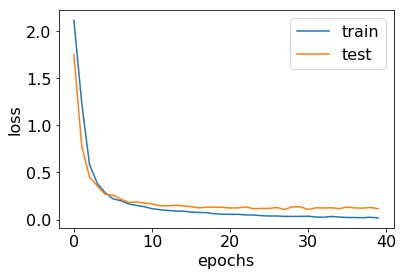

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test']);

**Early stopping** mixes these ideas: if the model starts to overfit, stop the optimization.

Note: it is easy to confuse the above type of plot with this type of plot, below:

In [61]:
train_errs = list()
test_errs = list()
layer_sizes = [10,25,50,100,200,300,500,750,1000]
for layer_size in layer_sizes:
    print(layer_size, end=" ")
    model = Sequential()
    model.add(Dense(layer_size, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=10, verbose=0)
    
    train_errs.append( 1 - model.evaluate(X_train, Y_train, verbose=0)[1] )
    test_errs.append(  1 - model.evaluate(X_test,  Y_test,  verbose=0)[1] )    

10 110 210 310 410 510 610 710 810 910 

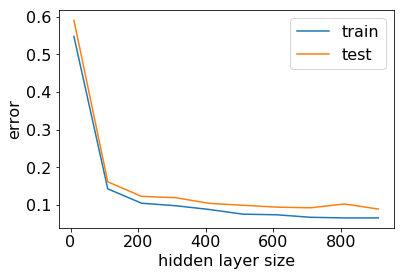

In [62]:
plt.plot(layer_sizes, train_errs, label="train")
plt.plot(layer_sizes, test_errs, label="test")
plt.legend()
plt.xlabel("hidden layer size");
plt.ylabel("error");

These figures look similar but are plotting completely different things!!!!!

## More true/false (10 min)

1. Each iteration of stochastic gradient is faster than each iteration of gradient descent, but we likely need more iterations in total.
2. One epoch of stochastic gradient takes about the same amount of time as one iteration of gradient descent.
3. Stochastic gradient with a minibatch size of $n$ is the same thing as gradient descent.
4. In terms of the fundamental tradeoff, more layers and larger layers both lead to lower training error.


## Wrap-up (5 min)

#### Summary

- Neural nets for classification use one-hot encoding, softmax activation, cross-entropy loss.
- Stochastic gradient allows for fast training on big data sets.
- Optimization is complicated, can have many of its own hyperparameters; an area of active research.
  - In fact, the choice of optimization algorithm can itself be considered a discrete hyperparameter.
- Neural networks are very complex, reguarlization is hard.

#### Preview

- Next week: convolutional neural networks
- State-of-the-art when inputs are signals: 1D (e.g. audio), 2D (e.g. image), 3D (e.g. video), etc.

## (optional) Backpropagation


The squared loss (a not-uncommon choice for regression) is

$$f\left(\{W^{(l)}\}\right)= \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2  $$

Let's digest this...

- by $\{W^{(l)}\}$ I mean the set of all $W$'s and all their elements
- by $\hat{y}_i$ I mean our prediction for example $x_i$, which we get from applying our recurrence relation $L$ times.

We need $$\frac{df}{dW}$$

This is done via the chain rule. But we need to be careful not to _recompute_ things (remember dynamic programming?? it was all about not recomputing things). 

We can draw a graph of what depends on what. Consider $\frac{\partial f}{\partial W^{(0)}_{11}}$ and $\frac{\partial f}{\partial W^{(0)}_{12}}$. These two derivatives have a lot in commmon, namely...

$$ \frac{\partial f}{\partial x^{(L)}} \frac{\partial x^{(L)}}{\partial x^{(L-1)}} \cdots \frac{\partial x^{(2)}}{\partial x^{(1)}} \frac{\partial x^{(1)}}{\partial W^{(0)}}$$ 

only the last part is different.

- The method for applying the chain rule and not re-computing anything is called **backpropagation** or backprop for short. 
- Backprop is reverse-mode differentiation. So packages like AutoGrad do it "for free".
- Once we have the gradient, we can train with (stochastic) gradient descent. 
